In [82]:
# MNIST dataset classification
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random

In [83]:
# same set of numbers
np.random.seed(0)

In [84]:
# load 2 tuples one for training the model and one for testing, each with the datasets and their respective labels
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [85]:
# shape of train and test data sets are the same --> 28 x 28 pixels with varying intensity values
# train dataset is much larger with 60000 and test with 10000 --> larger datasets reduce overfitting so more dynamic and better at fitting dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [86]:
# assert function used to validate a condition based on the single input arguament
# ensure all data in dataset has a corresponding label
# if condition is not met then code terminates
assert(X_train.shape[0] == y_train.shape[0]), "the number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "the number of images is not equal to the number of labels."
# ensure images are 28x28 pixels
assert(X_train.shape[1:] == (28,28)), "image dimensions are not 28x28"
assert(X_test.shape[1:] == (28,28)), "image dimensions are not 28x28"

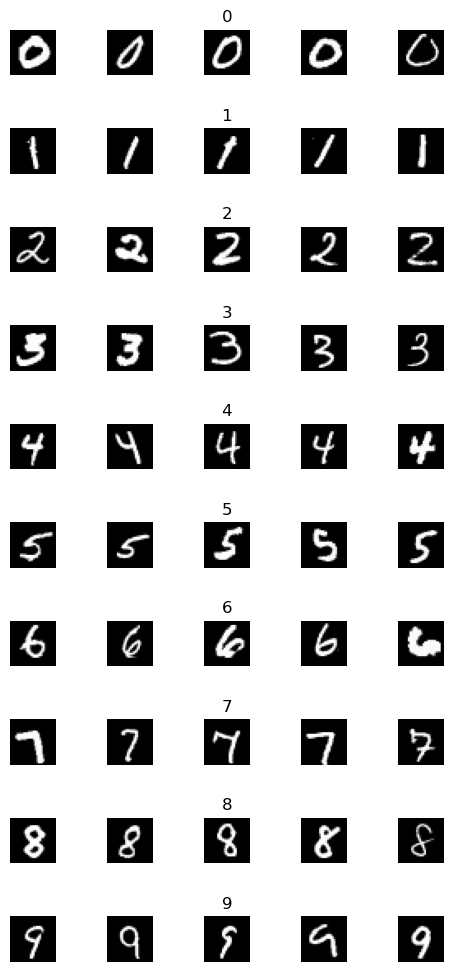

In [87]:
number_of_samples = []
# display a sample of images from mnist dataset in grid form
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 10))
# make sure figures don't overlap
fig.tight_layout()
# loop through each class
for i in range(cols):
    # loop through each sample in the class
    for j in range(num_classes):
        # get a random sample from the specific j class
        x_selected = X_train[y_train == j]
        # plot the random image from the size of the training dataset
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1))], cmap = 'gray')
        axs[j][i].axis("off")
        # if in the middle of the grid title the row with the sample number
        if i == 2:
            axs[j][i].set_title(str(j))
            # identify the number of samples for each class i.e. number 
            number_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

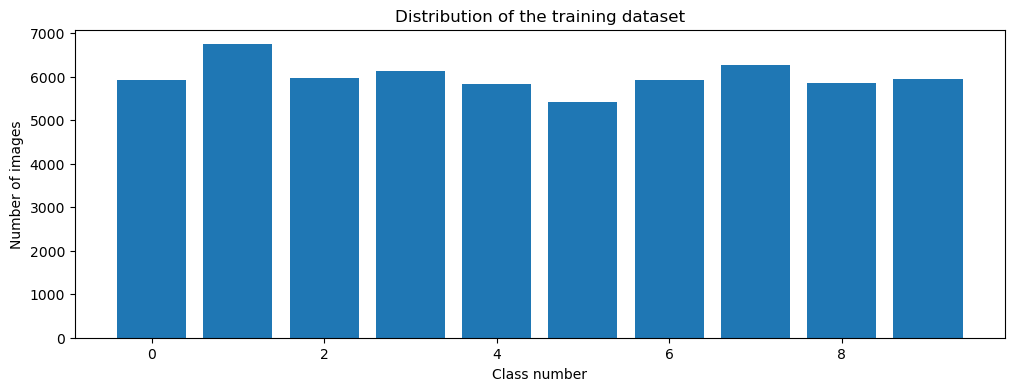

In [88]:
# plot the number of samples in each class in bar graph style
print(number_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), number_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [89]:
# prepare data for training
# one hot encode data labels as is a multiclass dataset
# input arguaments for to_categorical is labelled dataset and number of classes 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [90]:
# normalise datasets by 255 so max intensity pixel value is 1 and min is 0 and range is normalised
X_train = X_train/255
X_test = X_test/255

In [91]:
# reformat datasets from 28x28 to a single row of 784 pixels in one image for matrix operations
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [92]:
# create neural network
def create_model():
    model = Sequential()
    # require 784 input nodes on input layer for each pixel and 10 output nodes in output layer for each class and a hidden layer with relu non linear activation function
    # input layer 
    model.add(Dense(10, input_dim = num_pixels, activation = 'relu'))
    # hidden layers
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    # output layer
    # softmax function used to match the data to the class of highest probability
    model.add(Dense(num_classes, activation = 'softmax'))
    # configure model
    model.compile(Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [93]:
model = create_model()
print(model.summary())

c:\Users\44780\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,180 (31.95 KB)

 Trainable params: 8,180 (31.95 KB)

 Non-trainable params: 0 (0.00 B)

None


In [94]:
# train model with training dataset, labels and split the training dataset into 2 with validation dataset to provide optimal fitting 
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6956 - loss: 0.9262 - val_accuracy: 0.9258 - val_loss: 0.2671
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9059 - loss: 0.3254 - val_accuracy: 0.9330 - val_loss: 0.2330
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9175 - loss: 0.2830 - val_accuracy: 0.9262 - val_loss: 0.2430
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9195 - loss: 0.2737 - val_accuracy: 0.9317 - val_loss: 0.2339
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9244 - loss: 0.2561 - val_accuracy: 0.9348 - val_loss: 0.2246
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9255 - loss: 0.2500 - val_accuracy: 0.9390 - val_loss: 0.2179
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9283 - loss: 0.2470 - val_accuracy: 0.9342 - val_loss: 0.2267
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9265 - loss: 0.2459 - val_accuracy: 0.

Text(0.5, 0, 'epoch')

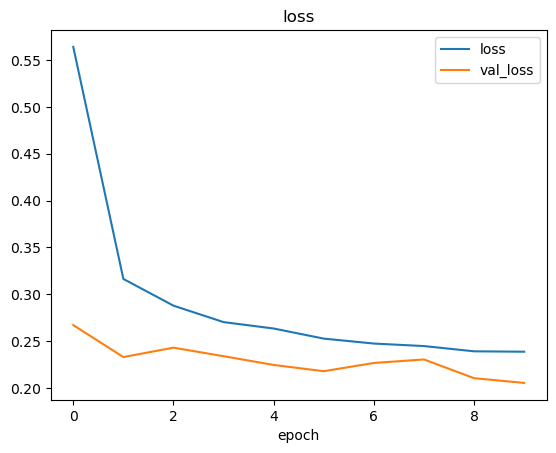

In [95]:
# plot training loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

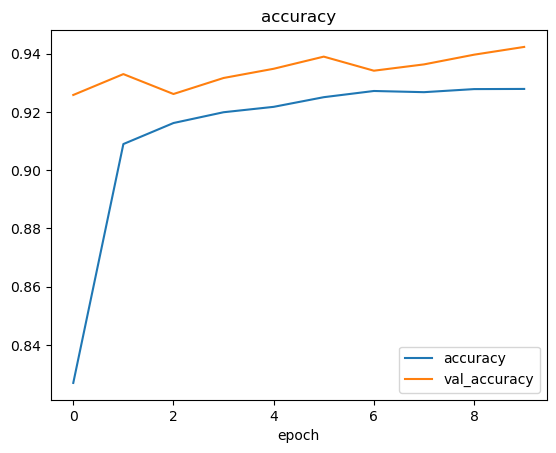

In [96]:
# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

In [97]:
# evaluate the model accuracy and error/loss
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test Score/Loss:", score[0])
print("Test Accuracy:", score[1])

Test Score/Loss: 0.24661771953105927
Test Accuracy: 0.9289000034332275


<Response [200]>


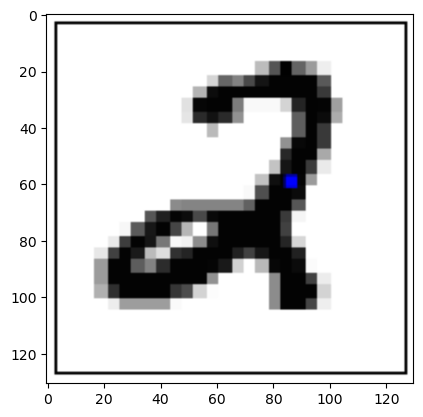

In [98]:
# obtain a test image for testing the model using a get request
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream = True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

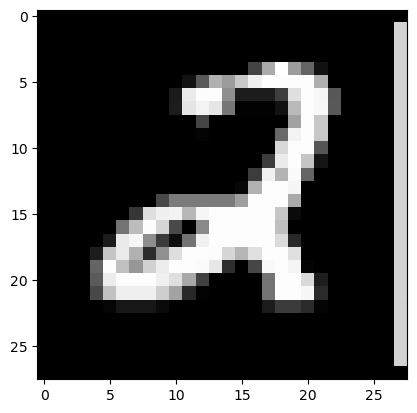

In [99]:
# reformat into 28x28 grayscale image using cv2 library
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
grayscale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
# invert grayscale in line with training dataset
image = cv2.bitwise_not(grayscale)
plt.imshow(image, cmap = 'gray')

In [100]:
# normalise input image
image = image/255
image = image.reshape(1, 784)

In [103]:
# obtain probabilities for each class
prediction = model.predict(image)
print("probabilities:", str(prediction))
# predict the class
predicted_class = prediction.argmax(axis=-1)
print("Predicted class:", predicted_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
probabilities: [[1.1648087e-08 2.9539529e-05 9.9935335e-01 4.4031025e-04 5.2416243e-07
  7.2541246e-05 3.4221923e-06 7.2409780e-09 1.0028426e-04 6.4124627e-08]]
Predicted class: 2
